## EDA for the Log Anamly

In [1]:
import collections
import copy
import re
import string
import time

import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import polars as pl
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

nltk.download('stopwords')
import warnings
from pathlib import Path

from nltk.corpus import stopwords
from nltk.util import ngrams
from yellowbrick.target import class_balance

# Ignore font-related warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib.font_manager")
plt.rcParams['font.sans-serif'] = 'DejaVu Sans'  # Specify a fallback font
plt.rcParams['font.family'] = 'sans-serif'  # Fallback to sans-serif if the desired font is not found

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
current_dir = Path.cwd()
project_dir = current_dir.parent
train_path=  Path(project_dir, 'data/raw/raw_train.gzip')

In [3]:
df = pd.read_parquet(train_path)
df.head()

,Log,Target
0,1117838570 2005.06.03 R02-M1-N0-C:J12-U11 200...,normal
1,1117838570 2005.06.03 R02-M1-N0-C:J12-U11 200...,normal
2,1117838570 2005.06.03 R02-M1-N0-C:J12-U11 200...,normal
3,1117838570 2005.06.03 R02-M1-N0-C:J12-U11 200...,normal
4,1117838570 2005.06.03 R02-M1-N0-C:J12-U11 200...,normal


In [4]:
df.head()

,Log,Target
0,1117838570 2005.06.03 R02-M1-N0-C:J12-U11 200...,normal
1,1117838570 2005.06.03 R02-M1-N0-C:J12-U11 200...,normal
2,1117838570 2005.06.03 R02-M1-N0-C:J12-U11 200...,normal
3,1117838570 2005.06.03 R02-M1-N0-C:J12-U11 200...,normal
4,1117838570 2005.06.03 R02-M1-N0-C:J12-U11 200...,normal


In [5]:
print(f"Dataset is has {df.shape[0]} samples")

Dataset is has 4152659 samples


# BREAK POINT

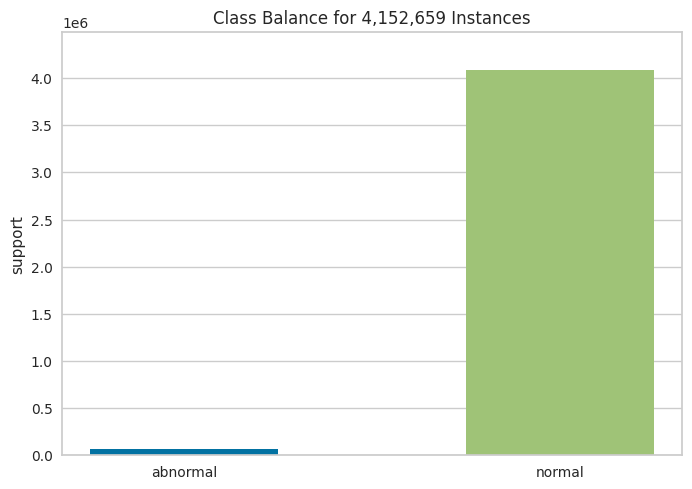

ClassBalance(ax=<Axes: title={'center': 'Class Balance for 4,152,659 Instances'}, ylabel='support'>)

In [6]:
class_balance(df['Target'])

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(df['Log'], df['Target'], random_state= 23, test_size=0.97,
                                                    stratify=df['Target'])

In [8]:
X_train.shape, Y_train.shape

((124579,), (124579,))

In [9]:
df = pd.DataFrame()
df['Log'] = X_train
df['Target'] = Y_train
df.reset_index(inplace=True)
df.drop(['index'], axis = 1,inplace= True)
df.head()

,Log,Target
0,1131126201 2005.11.04 R62-M0-NA-C:J09-U01 200...,normal
1,1122165897 2005.07.23 R13-M0-N2-C:J10-U01 200...,normal
2,1119567066 2005.06.23 R23-M0-N0-C:J13-U11 200...,normal
3,1120216356 2005.07.01 R31-M0-NA-C:J13-U11 200...,normal
4,1121598556 2005.07.17 R10-M0-N5-C:J14-U11 200...,normal


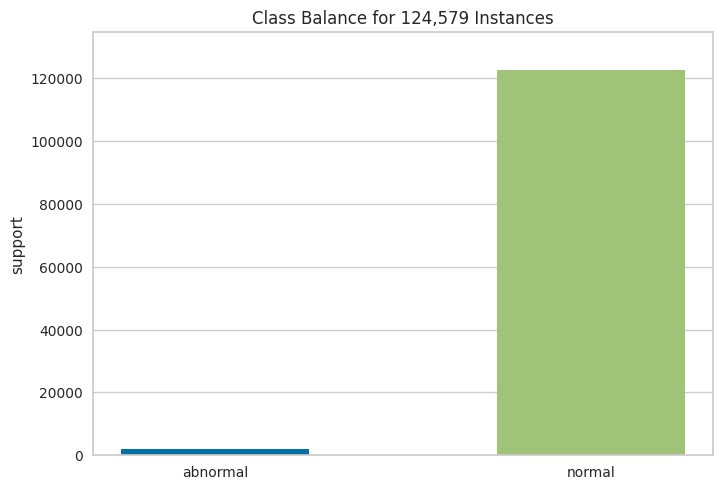

ClassBalance(ax=<Axes: title={'center': 'Class Balance for 124,579 Instances'}, ylabel='support'>)

In [10]:
class_balance(df['Target'])

In [11]:
#Exploring a few samples 
samples = list(df.iloc[:5,0])
for doc in samples:
    print(doc)

 1131126201 2005.11.04 R62-M0-NA-C:J09-U01 2005-11-04-09.43.21.083119 R62-M0-NA-C:J09-U01 RAS KERNEL INFO iar 00106834 dear 0245cd1c

 1122165897 2005.07.23 R13-M0-N2-C:J10-U01 2005-07-23-17.44.57.295457 R13-M0-N2-C:J10-U01 RAS KERNEL INFO generating core.5605

 1119567066 2005.06.23 R23-M0-N0-C:J13-U11 2005-06-23-15.51.06.476674 R23-M0-N0-C:J13-U11 RAS KERNEL INFO 12364800 double-hummer alignment exceptions

 1120216356 2005.07.01 R31-M0-NA-C:J13-U11 2005-07-01-04.12.36.825359 R31-M0-NA-C:J13-U11 RAS KERNEL INFO generating core.22581

 1121598556 2005.07.17 R10-M0-N5-C:J14-U11 2005-07-17-04.09.16.994306 R10-M0-N5-C:J14-U11 RAS KERNEL INFO generating core.27816



In [12]:
df.iloc[4,0].split()

['1121598556',
 '2005.07.17',
 'R10-M0-N5-C:J14-U11',
 '2005-07-17-04.09.16.994306',
 'R10-M0-N5-C:J14-U11',
 'RAS',
 'KERNEL',
 'INFO',
 'generating',
 'core.27816']

In [13]:
df["Character_Length"] = df["Log"].str.len()
df["Word_Length"] = df["Log"].str.split().map(lambda x: len(x))
df["Avg Word"] = df["Log"].str.split().apply(lambda x: [len(i) for i in x]).map(lambda x: np.mean(x))
df.head()

,Log,Target,Character_Length,Word_Length,Avg Word
0,1131126201 2005.11.04 R62-M0-NA-C:J09-U01 200...,normal,133,12,10.000000
1,1122165897 2005.07.23 R13-M0-N2-C:J10-U01 200...,normal,127,10,11.600000
2,1119567066 2005.06.23 R23-M0-N0-C:J13-U11 200...,normal,150,12,11.416667
3,1120216356 2005.07.01 R31-M0-NA-C:J13-U11 200...,normal,128,10,11.700000
4,1121598556 2005.07.17 R10-M0-N5-C:J14-U11 200...,normal,128,10,11.700000


In [14]:
print(f"Character Length ranges from {df['Character_Length'].min()} to {df['Character_Length'].max()}")
print(f"Word Length ranges from {df['Word_Length'].min()} to {df['Word_Length'].max()}")

Character Length ranges from 94 to 723
Word Length ranges from 8 to 83


array([[<Axes: title={'center': 'Character_Length'}>,
        <Axes: title={'center': 'Word_Length'}>]], dtype=object)

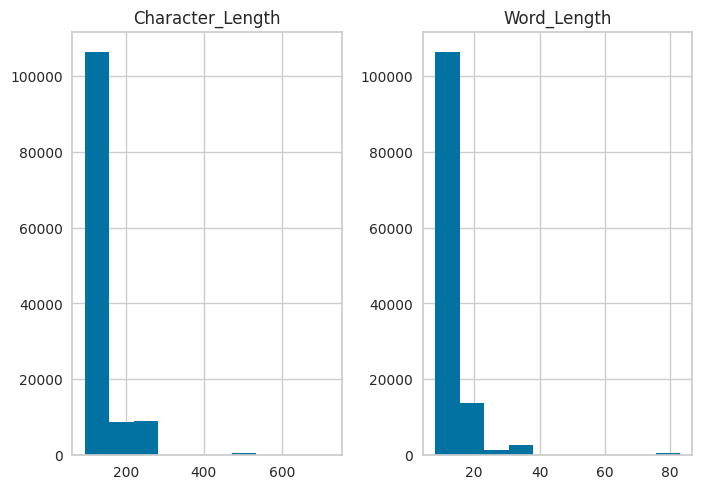

In [15]:
columns = ['Character_Length', 'Word_Length']
df.hist(column=columns, grid=True)

In [16]:
def plot_top_stopwords_barchart(text):
    stop = set(stopwords.words('english'))

    new = text.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]
    from collections import defaultdict
    dic = defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
    top = sorted(dic.items(), key = lambda x:x [1],reverse=True)[:10]
    x,y = zip(*top)
    plt.bar(x,y)

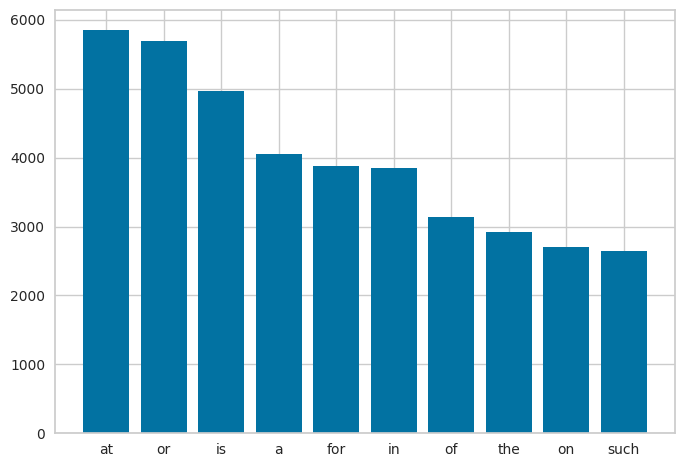

In [17]:
plot_top_stopwords_barchart(df['Log'])

In [18]:
def clean_text(text):
    text = text.lower()
    text = re.sub('<[^>]*>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    stop_words = set(stopwords.words('english'))
    text = [word for word in text.split() if word not in stop_words and word not in string.punctuation]
    text = ' '.join(word for word in text)
    return text

In [19]:
df['Log'] = df['Log'].apply(clean_text)

In [20]:
df.head()

,Log,Target,Character_Length,Word_Length,Avg Word
0,rmnacju rmnacju ras kernel info iar dear cdc,normal,133,12,10.000000
1,rmncju rmncju ras kernel info generating core,normal,127,10,11.600000
2,rmncju rmncju ras kernel info doublehummer ali...,normal,150,12,11.416667
3,rmnacju rmnacju ras kernel info generating core,normal,128,10,11.700000
4,rmncju rmncju ras kernel info generating core,normal,128,10,11.700000


In [21]:
def plot_top_non_stopwords_barchart(text):
    stop = set(stopwords.words('english'))
    new = text.str.split()
    new = new.values.tolist()
    corpus =[word for i in new for word in i ]
    counter = collections.Counter(corpus)
    most = counter.most_common()
    x, y =[], []
    for word, count in most[:30]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    sns.barplot(x=y,y=x)

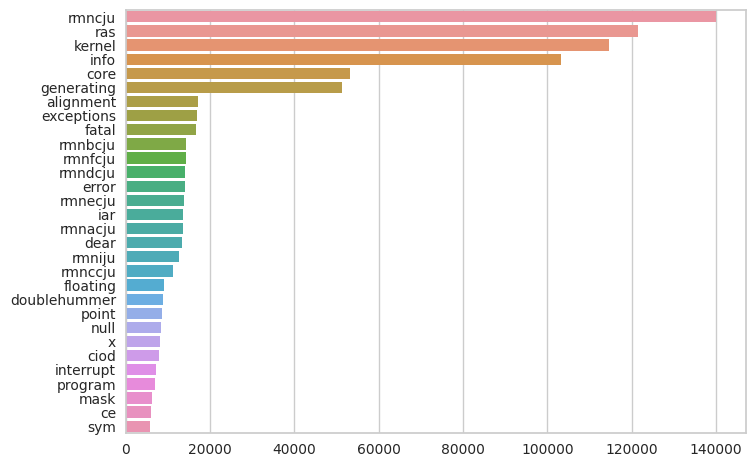

In [22]:
plot_top_non_stopwords_barchart(df['Log'])

In [23]:
def plot_top_word_grams_barchart(text, no_grams = 2):
    stop = set(stopwords.words("english"))
    new = text.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range =(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0,idx])
                      for word, idx in vec.vocabulary_.items()]
        words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]
    top_n_bigrams= _get_top_ngram(text, no_grams)[:10]
    x,y = map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

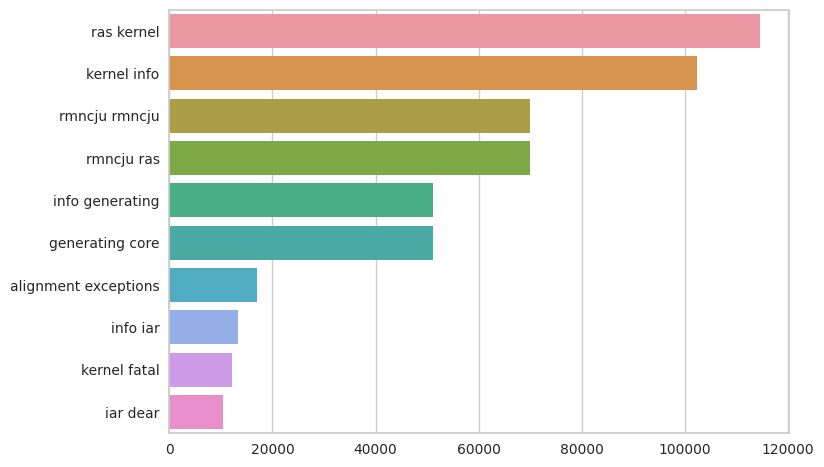

In [24]:
plot_top_word_grams_barchart(df['Log'])